In [7]:
# access for combinded / cleaned data
%run CleanData.ipynb

In [8]:
X_train.shape

(99195, 133)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Masking
from tensorflow.keras.utils import to_categorical
import numpy as np

# Remap labels: 6 → 0 (Normal), 7 → 5 (Abnormal)
y_train = y_train.replace({6: 0, 7: 5})
y_test = y_test.replace({6: 0, 7: 5})


# Reshape input for RNN: (samples, timesteps, features)
# Here, treat each row as a sequence of 188 timesteps with 1 feature per timestep
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to categorical if needed
num_classes = int(max(y_train.max(), y_test.max())) + 1
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


# Build RNN model
model = Sequential([
    Masking(mask_value=0., input_shape=(X_train.shape[1], 1)),
    SimpleRNN(32, activation='tanh'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test_rnn, y_test_cat))



Epoch 1/10


c:\Users\plui0\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1550/1550 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7314 - loss: 0.9183 - val_accuracy: 0.7641 - val_loss: 0.8410
Epoch 2/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7644 - loss: 0.8177 - val_accuracy: 0.8065 - val_loss: 0.6871
Epoch 3/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8064 - loss: 0.6803 - val_accuracy: 0.8060 - val_loss: 0.6742
Epoch 4/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8079 - loss: 0.6658 - val_accuracy: 0.8100 - val_loss: 0.6720
Epoch 5/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8076 - loss: 0.6742 - val_accuracy: 0.8157 - val_loss: 0.6437
Epoch 6/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8122 - loss: 0.6513 - val_accuracy: 0.8175 - val_loss: 0.6355
Epoch 7/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8154 - loss: 0.6368 - val_accuracy: 0.7641 - val_loss: 0.8731
Epoch 8/10
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7617 - loss: 0.87

In [10]:
history.model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 133, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,860 (15.08 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,574 (10.06 KB)

776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


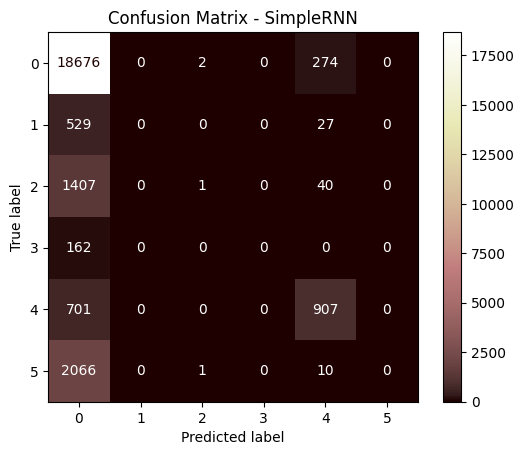

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict class labels
y_pred_prob = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.astype(int)

# Create and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='pink')  # Set color scheme to pink
plt.title("Confusion Matrix - SimpleRNN")
plt.show()
